## 매개변수 갱신
- 신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것
- 이것은 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 최적화라 함.

### 확률적 경사 하강법(SGD)

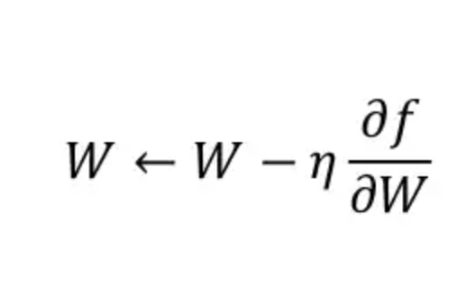

In [1]:
class SGD:
  def __init__(self, lr = 0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

- optimizer는 '최적화를 행하는 자'라는 뜻
- 매개변수 갱신은 optimizer가 책임지고 수행하니 optimizer에 매개변수와 기울기 정보만 넘겨주면 됨.

### SGD의 단점


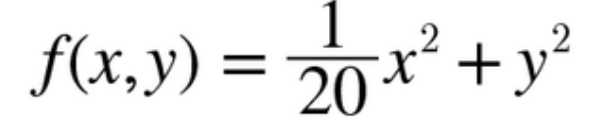함수의 그래프와 등고선

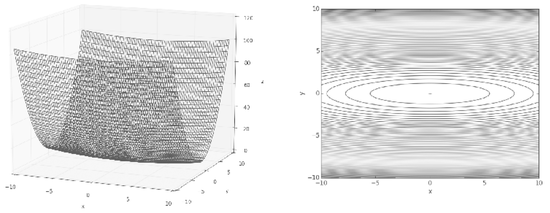

[SGD에 의한 최적화 갱신 경로: 최솟값인 (0,0)까지 재그재그로 이동하니 비효율적이다.

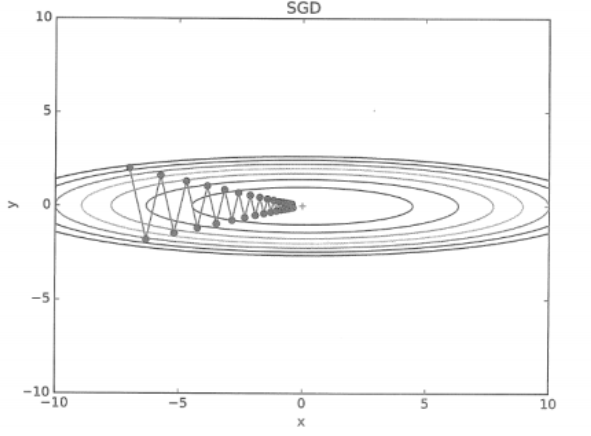

- SGD의 단점은 비등방성 함수(방향에 따라 성질, 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적임.
- SGD의 단점을 개선해주는 방법: 모멘텀, AdaGrad, Adam

### 모멘텀
- 모멘텀은 운동량을 뜻하는 단어로, 물리와 관계가 있음.
- 모멘텀 수식은 다음과 같이 쓸 수 있음.

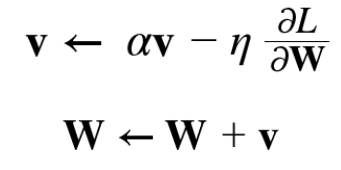

- W는 갱신할 가중치 매개변수, 손실함수에 대한 기울기, η는 학습률임. v는 물리에서 말하는 속도에 해당됨.
- 모멘텀은 공이 그릇의 바닥을 구르는 듯한 움직임을 보여줌.
- αv항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할. 물리에서의 지면 마찰이나 공기 저항에 해당

In [2]:
# 모멘텀 구현

import numpy as np
class Momentum:
  def __init__(self, lr = 0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

    for key in params.keys():
      self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
      params[key] += self.v[key]

[모멘텀에 의한 최적화 갱신 경로]

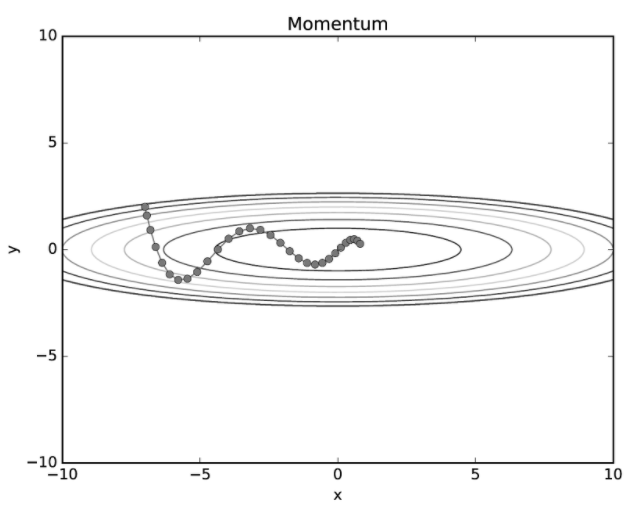

- 모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯 움직임.
- SGD와 비교하면 '지그재그 정도'가 덜함. 이는 x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문임.
- 거꾸로 y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않음.
- 전체적으로 SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어듦.

### AdaGrad

- 신경망 학습에는 학습률 값이 중요함. 이 값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 발산하여 학습이 제대로 이루어지지 않음.
- 이 학습률을 정하는 효과적 기술로 학습을 진행하면서 학습률을 점차 줄여가는 학습률 감소가 있음.
- 이를 더욱 발전시킨 것이 AdaGrad임. AdaGrad는 '각각의 매개변수에 맞는 맞춤형' 값을 만들어줌.
- AdaGrad는 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행함.
- AdaGrad의 갱신 방법 수식

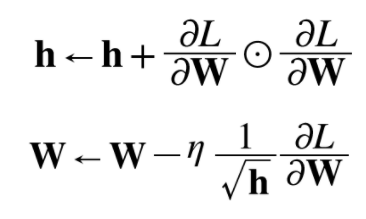

- AdaGrad는 과거의 기울기를 제곱하여 계속 더해감. 그래서 학습을 진행할수록 갱신 강도가 약해짐. 실제로 무한히 계속 학습한다면 어느 순간 갱신량이 0이 되어 전혀 갱신되지 않게됨. 이 문제를 개선한 기법으로 RMSProp이라는 방법이 있음. RMSProp은 과거의 모든 기울기를 균일하게 더해가는 것이 아니라, 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영함. 이를 지수이동평균이라 하여, 과거 기울기의 반영 규모를 기하급수적으로 감소시킴

In [3]:
# AdaGrad 구현
class AdaGrad:
  def __init__(self, lr = 0.01):
    self.lr = lr
    self.h = None

  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)

    for key in params.keys():
      self.h[key] += grads[key] * gras[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

- 여기에서 주의할 것은 마지막 줄에서 1e-7이라는 자은 값을 더하는 부분임. 디 작은 값은 self.h[key]에 0이 담겨있따 해도 0으로 나누는 사태를 막아줌.
<br/>
<br/>
[AdaGrad]에 의한 최적화 갱신 경로

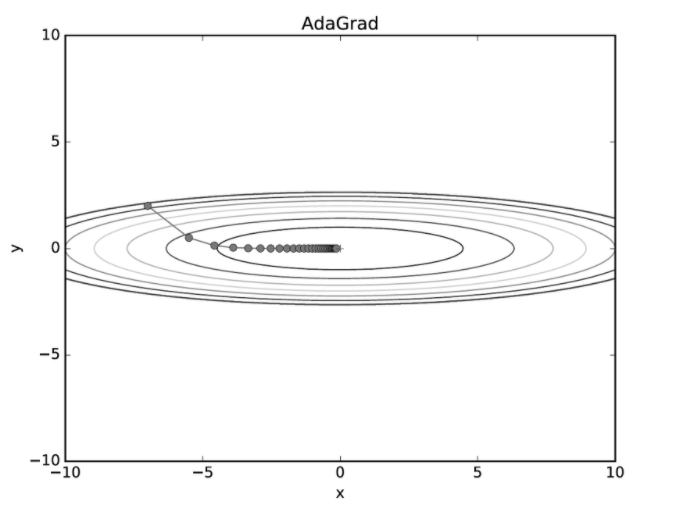

<br/>
<br/>
 그림을 보면 최솟값을 향해 효율적으로 움직임. y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정됨. 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어듦.

### Adam
- 모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보이고, AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정함. 이 두 기법을 융합한 것이 Adam임.
- 매개변수 공간을 효율적으로 탐색해주고, 하이퍼파리머트의 '편향 보정'이 진행됨.
<br/>
<br/>

[Adam에 의한 최적화 갱신 경로]

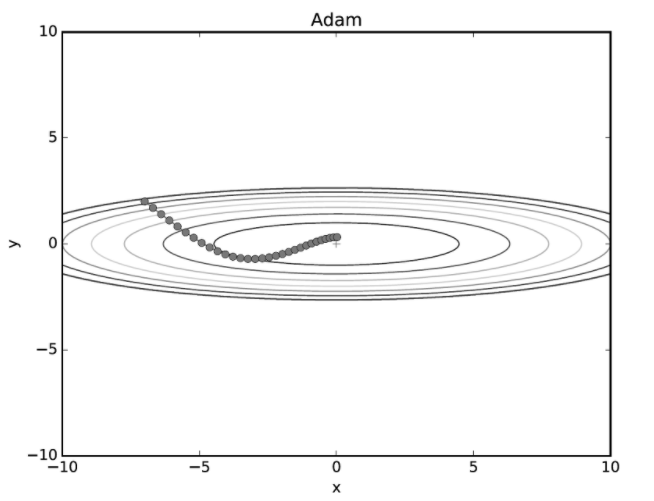

<br/>
<br/>
- Adam 갱신 과정도 그릇 바닥을 구르듯 움직임. 모멘텀과 비슷한 패턴인데, 모멘텀 때보다 공의 좌우 흔들림이 적음. 이는 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택임.

In [4]:
%cd /content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝

/content/drive/MyDrive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝


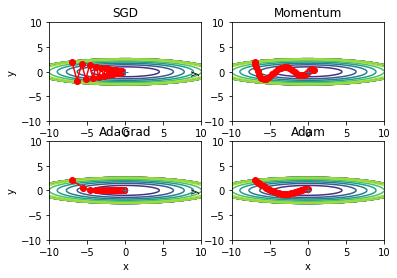

In [5]:
# optimizer 비교
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common_optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.428726492787595
Momentum:2.3375176017947883
AdaGrad:2.2439740401743693
Adam:2.188177227428361
===========iteration:100===========
SGD:1.8409417157232286
Momentum:0.3888063567988816
AdaGrad:0.20723802938778826
Adam:0.3157822046907306
===========iteration:200===========
SGD:0.9575579784526888
Momentum:0.2714461913703191
AdaGrad:0.14820858835409734
Adam:0.21126326087747432
===========iteration:300===========
SGD:0.6360790320712538
Momentum:0.18521415061512922
AdaGrad:0.04947138257223295
Adam:0.06450327251229986
===========iteration:400===========
SGD:0.4511031686544134
Momentum:0.1978890370919401
AdaGrad:0.04903006723137637
Adam:0.09678566419936238
===========iteration:500===========
SGD:0.4261163225308727
Momentum:0.18617906061853753
AdaGrad:0.07762431517679166
Adam:0.10253118856385005
===========iteration:600===========
SGD:0.3343086032939252
Momentum:0.14708852567330485
AdaGrad:0.07047705632246791
Adam:0.09041360072100155
===========iteration:700

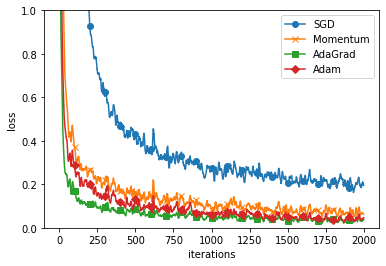

In [6]:
# mnist 데이터셋으로 optimizer 비교

import os
import sys
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from mnist import load_mnist
from common_util import smooth_curve
from common_multi_layer_net import MultiLayerNet
from common_optimizer import *



(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 가중치의 초깃값

신경망 학습에서 특히 중요한 것이 가중치의 초깃값임. 가중치의 초깃값을 무엇으로 설정하느냐가 신경망 학습의 성패가 가르는 일이 실제로도 자주 있음.

<br/>

### 초깃값을 0으로 하면?

- 오버피팅을 억제해 범용 성능을 높이는 테크닉 : 가중치 감소 기법
- 가중치 감소는 가중치 매개변수의 값이 작아지도록 학습하는 방법. 가중치 값을 작게 하여 오버피팅이 일어나지 않게 함.
- 가중치의 초깃값을 최대한 작게 만들면 가중치를 작게 만들 수 있음.
- 그러나 초깃값을 0으로 하면 학습이 올바르게 이뤄지지 않음.
- 초깃값이 0이 되면 오차 역전파법에서 모든 가중치의 값이 똑같이 갱신됨.


### 은닉층의 활성화값 분포

은닉층의 활성화값(활성화 함수의 출력 데이터)의 분포를 관찰하면 중요한 정보를 얻을 수 있음.

In [7]:
# 은닉층 활성화 값의 변화 실험
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100                  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           # 은닉층이 5개
activations= {}                 # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 1
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

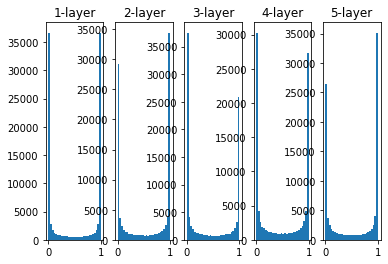

In [8]:
# 히스토그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i + 1)
  plt.title(str(i+1) + '-layer')
  plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

각 층의 활성화 값들이 0과 1에 치우쳐 분포되어 있음. 여기에서 사용한 시그모이드 함수는 그 출력이 0에 가까워지면 그 미분은 0에 가까워짐. 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라짐.

이것이 기울기 소실 문제임.

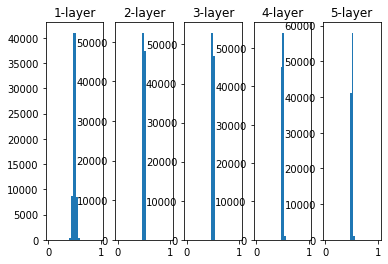

In [9]:
# 은닉층 활성화 값의 변화 실험2
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100                  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           # 은닉층이 5개
activations= {}                 # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 0.01    # 초깃값 설정 부분 변경
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i + 1)
  plt.title(str(i+1) + '-layer')
  plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

초깃값을 0.01로 할 경우 0.5 부근에 집중됨. 기울기 소실 문제는 일어나지 않지만 화설화 값들이 치우쳤다는 것은 표현력 관점에서는 다수의 뉴런이 거의 같은 값을 출력하고 있다는 문제가 생김.

### Xavier 초깃값
계층의 노드가 n개라면 표준편차가 1/√n인 분포를 사용


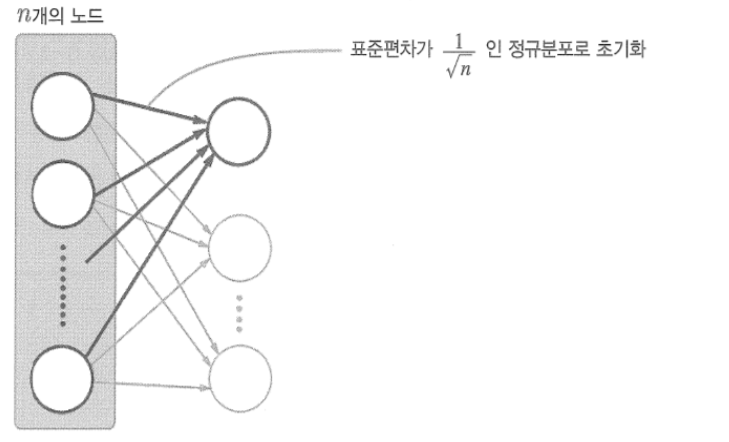

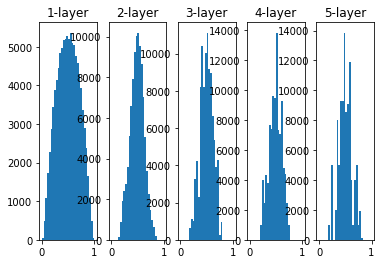

In [10]:
# 은닉층 활성화 값의 변화 실험3 Xavier 초깃값 사용
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100                  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           # 은닉층이 5개
activations= {}                 # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) / np.sqrt(node_num)    # 초깃값 설정 부분 변경
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i + 1)
  plt.title(str(i+1) + '-layer')
  plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

층이 깊어질수록 형태가 다소 일그러지지만 앞의 방식들보다 넓게 분포됨.

### ReLU를 사용할 떄의 가중치 초깃값

Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과임. sigmoid 함수와 tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있으므로 Xavier 초깃값이 적절함.

<br/>
반면 ReLU를 이용할 때는 ReLU이 특화된 초깃값을 이요하라고 권장함. 이 초깃값은 He 초깃값이라고 함.

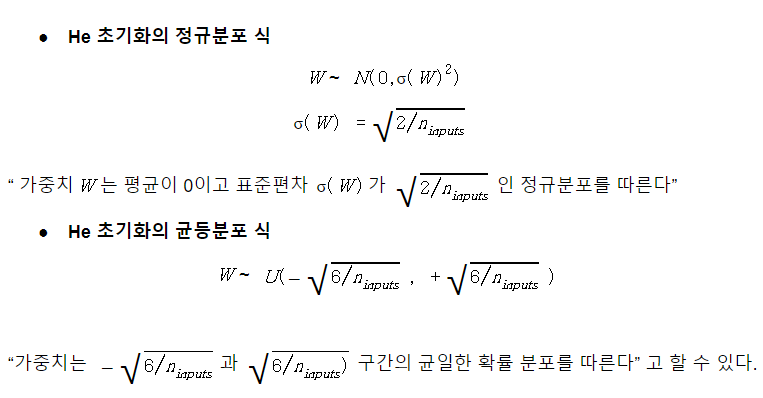

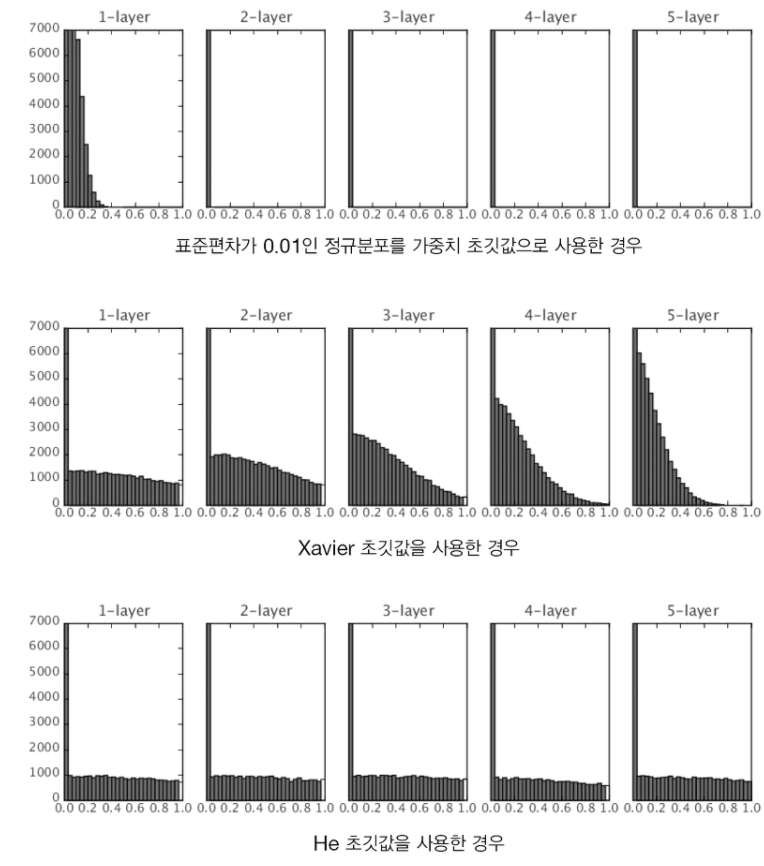

Xavier 초깃값 결과를 보면 이쪽은 층이 깊어지면서 치우침이 조금씩 커짐. 실제로 층이 깊어지면 활성화값들의 치우침도 커지고, 학습할 때 '기울기 소실'문제를 일으킴.

<br/>
마지막으로 He 초깃값은 모든 층에서 균일하게 분포되었습니다. 층이 깊어져도 분포가 균일하게 유지되기에 역전파 때도 적절한 값이 나옴.

### mnist 데이터셋으로 본 가중치 초깃값 비교

뉴런수가 100개인 5층 신경망에서 활성화 함수로 ReLU 사용

===========iteration:0===========
std=0.01:2.3024835723174157
Xavier:2.296286908187446
He:2.596634587671198
===========iteration:100===========
std=0.01:2.302155837403796
Xavier:2.228299429149956
He:1.4297725443567775
===========iteration:200===========
std=0.01:2.3014940316925396
Xavier:2.0497626351490617
He:0.7408591523164721
===========iteration:300===========
std=0.01:2.3034893571656347
Xavier:1.589772366678942
He:0.5742317103697636
===========iteration:400===========
std=0.01:2.300033316627845
Xavier:1.0311513091191058
He:0.49383818587709305
===========iteration:500===========
std=0.01:2.300974401516582
Xavier:0.6137759974890147
He:0.27143689402289495
===========iteration:600===========
std=0.01:2.2999098534226645
Xavier:0.6345433469499717
He:0.4405022068938984
===========iteration:700===========
std=0.01:2.2963369590149587
Xavier:0.35070515652339757
He:0.24178247627976296
===========iteration:800===========
std=0.01:2.3038010809222325
Xavier:0.39727154914118756
He:0.2407018246110

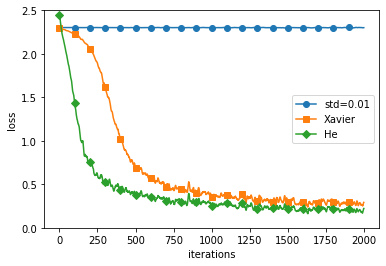

In [11]:
import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common_util import smooth_curve
from common_multi_layer_net import MultiLayerNet
from common_optimizer import SGD


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000



weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []



for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))



markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## 배치 정규화

### 배치 정규화 알고리즘
- 학습을 빨리 진행할 수 있다.(학습 속도 개선)
- 초깃값에 크게 의존하지 않는다.(골치 아픈 초깃값 선택 장애여 안녕!)
- 오버피팅을 억제한다.(드론아웃 등의 필요성 감소)

<br/>
[배치 정규화를 사용한 신경망의 예]

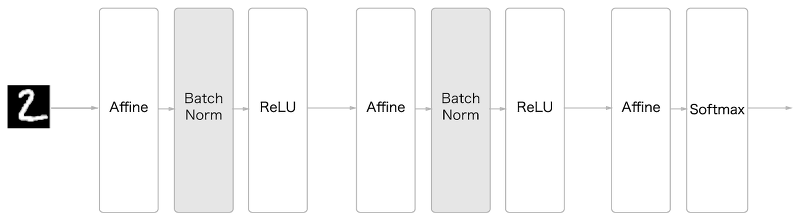

배치 정규화는 학습 시 미니배치를 단위로 정규화 함.

구체적으로는 데이터 분포가 평균이 0, 분산이 1이 되도록 정규화함.

[배치 정규화 수식]

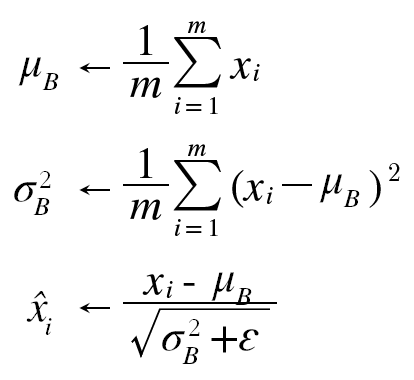

배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대와 이동 변환을 수행함.

수식으로는 다음과 같음.

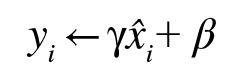

이 식에서 γ가 확대를, β가 이동을 담당함. 두 값은 처음에는 γ=1, β=0부터 시작하고, 학습하면서 적합한 값으로 조정해감.

이것이 배치 정규화의 알고리즘이며, 신경망에서 순전파 때 적용됨.

계산 그래프는 아래와 같음.

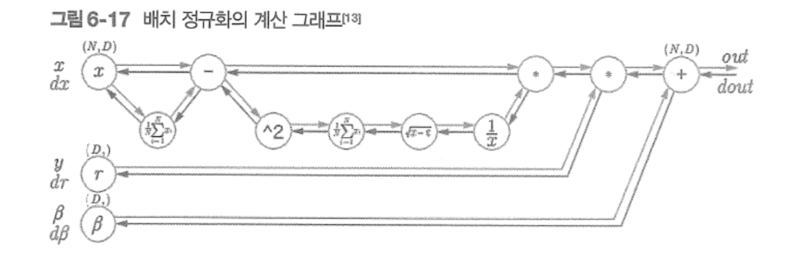

### 배치 정규화의 효과



============== 1/16 ==============
epoch:0 | 0.099 - 0.101


/content/drive/My Drive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝/common_multi_layer_net_extend.py:99: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/drive/My Drive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝/common_multi_layer_net_extend.py:99: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.08
epoch:2 | 0.097 - 0.104
epoch:3 | 0.097 - 0.126
epoch:4 | 0.097 - 0.139
epoch:5 | 0.097 - 0.162
epoch:6 | 0.097 - 0.189
epoch:7 | 0.097 - 0.211
epoch:8 | 0.097 - 0.235
epoch:9 | 0.097 - 0.254
epoch:10 | 0.097 - 0.279
epoch:11 | 0.097 - 0.302
epoch:12 | 0.097 - 0.315
epoch:13 | 0.097 - 0.344
epoch:14 | 0.097 - 0.37
epoch:15 | 0.097 - 0.379
epoch:16 | 0.097 - 0.404
epoch:17 | 0.097 - 0.424
epoch:18 | 0.097 - 0.439


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.451
============== 2/16 ==============
epoch:0 | 0.087 - 0.082


/content/drive/My Drive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝/common_multi_layer_net_extend.py:99: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/drive/My Drive/colab/deep_learning_basic/밑바닥부터_시작하는_딥러닝/common_multi_layer_net_extend.py:99: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.122
epoch:2 | 0.097 - 0.14
epoch:3 | 0.097 - 0.157
epoch:4 | 0.097 - 0.182
epoch:5 | 0.097 - 0.206
epoch:6 | 0.097 - 0.237
epoch:7 | 0.097 - 0.251
epoch:8 | 0.097 - 0.269
epoch:9 | 0.097 - 0.291
epoch:10 | 0.097 - 0.315
epoch:11 | 0.097 - 0.341
epoch:12 | 0.097 - 0.358
epoch:13 | 0.097 - 0.369
epoch:14 | 0.097 - 0.391
epoch:15 | 0.097 - 0.413
epoch:16 | 0.097 - 0.432
epoch:17 | 0.097 - 0.45
epoch:18 | 0.097 - 0.461


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.474
============== 3/16 ==============
epoch:0 | 0.118 - 0.125
epoch:1 | 0.336 - 0.14
epoch:2 | 0.528 - 0.161
epoch:3 | 0.623 - 0.182
epoch:4 | 0.68 - 0.206
epoch:5 | 0.725 - 0.241
epoch:6 | 0.788 - 0.267
epoch:7 | 0.823 - 0.298
epoch:8 | 0.853 - 0.328
epoch:9 | 0.871 - 0.356
epoch:10 | 0.878 - 0.394
epoch:11 | 0.9 - 0.422
epoch:12 | 0.929 - 0.446
epoch:13 | 0.936 - 0.479
epoch:14 | 0.955 - 0.502
epoch:15 | 0.962 - 0.536
epoch:16 | 0.97 - 0.543
epoch:17 | 0.967 - 0.569
epoch:18 | 0.977 - 0.597


No handles with labels found to put in legend.


epoch:19 | 0.98 - 0.621
============== 4/16 ==============
epoch:0 | 0.097 - 0.099
epoch:1 | 0.204 - 0.114
epoch:2 | 0.366 - 0.233
epoch:3 | 0.486 - 0.31
epoch:4 | 0.541 - 0.378
epoch:5 | 0.58 - 0.444
epoch:6 | 0.621 - 0.506
epoch:7 | 0.65 - 0.546
epoch:8 | 0.683 - 0.578
epoch:9 | 0.717 - 0.62
epoch:10 | 0.737 - 0.649
epoch:11 | 0.754 - 0.677
epoch:12 | 0.763 - 0.697
epoch:13 | 0.784 - 0.713
epoch:14 | 0.794 - 0.741
epoch:15 | 0.812 - 0.76
epoch:16 | 0.83 - 0.777
epoch:17 | 0.829 - 0.788
epoch:18 | 0.844 - 0.793


No handles with labels found to put in legend.


epoch:19 | 0.85 - 0.806
============== 5/16 ==============
epoch:0 | 0.11 - 0.108
epoch:1 | 0.112 - 0.159
epoch:2 | 0.115 - 0.286
epoch:3 | 0.115 - 0.41
epoch:4 | 0.117 - 0.508
epoch:5 | 0.119 - 0.572
epoch:6 | 0.119 - 0.644
epoch:7 | 0.119 - 0.69
epoch:8 | 0.118 - 0.719
epoch:9 | 0.121 - 0.748
epoch:10 | 0.126 - 0.767
epoch:11 | 0.13 - 0.788
epoch:12 | 0.14 - 0.797
epoch:13 | 0.148 - 0.814
epoch:14 | 0.161 - 0.834
epoch:15 | 0.18 - 0.843
epoch:16 | 0.206 - 0.857
epoch:17 | 0.242 - 0.874
epoch:18 | 0.257 - 0.882


No handles with labels found to put in legend.


epoch:19 | 0.268 - 0.891
============== 6/16 ==============
epoch:0 | 0.095 - 0.115
epoch:1 | 0.125 - 0.262
epoch:2 | 0.117 - 0.419
epoch:3 | 0.117 - 0.531
epoch:4 | 0.117 - 0.648
epoch:5 | 0.117 - 0.7
epoch:6 | 0.117 - 0.763
epoch:7 | 0.117 - 0.802
epoch:8 | 0.118 - 0.826
epoch:9 | 0.117 - 0.845
epoch:10 | 0.117 - 0.868
epoch:11 | 0.117 - 0.887
epoch:12 | 0.117 - 0.904
epoch:13 | 0.117 - 0.908
epoch:14 | 0.117 - 0.915
epoch:15 | 0.117 - 0.922
epoch:16 | 0.139 - 0.928
epoch:17 | 0.176 - 0.933
epoch:18 | 0.146 - 0.94


No handles with labels found to put in legend.


epoch:19 | 0.119 - 0.944
============== 7/16 ==============
epoch:0 | 0.099 - 0.163
epoch:1 | 0.117 - 0.291
epoch:2 | 0.116 - 0.553
epoch:3 | 0.116 - 0.681
epoch:4 | 0.116 - 0.755
epoch:5 | 0.116 - 0.803
epoch:6 | 0.116 - 0.824
epoch:7 | 0.116 - 0.851
epoch:8 | 0.116 - 0.87
epoch:9 | 0.116 - 0.902
epoch:10 | 0.116 - 0.933
epoch:11 | 0.116 - 0.942
epoch:12 | 0.116 - 0.954
epoch:13 | 0.116 - 0.959
epoch:14 | 0.116 - 0.967
epoch:15 | 0.116 - 0.972
epoch:16 | 0.116 - 0.978
epoch:17 | 0.116 - 0.984
epoch:18 | 0.116 - 0.988


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.986
============== 8/16 ==============
epoch:0 | 0.087 - 0.063
epoch:1 | 0.116 - 0.394
epoch:2 | 0.116 - 0.724
epoch:3 | 0.116 - 0.792
epoch:4 | 0.116 - 0.816
epoch:5 | 0.116 - 0.857
epoch:6 | 0.116 - 0.874
epoch:7 | 0.116 - 0.903
epoch:8 | 0.116 - 0.924
epoch:9 | 0.116 - 0.949
epoch:10 | 0.116 - 0.966
epoch:11 | 0.116 - 0.977
epoch:12 | 0.116 - 0.985
epoch:13 | 0.116 - 0.994
epoch:14 | 0.116 - 0.994
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.999
============== 9/16 ==============
epoch:0 | 0.097 - 0.092
epoch:1 | 0.117 - 0.36
epoch:2 | 0.117 - 0.623
epoch:3 | 0.117 - 0.743
epoch:4 | 0.117 - 0.775
epoch:5 | 0.117 - 0.853
epoch:6 | 0.117 - 0.877
epoch:7 | 0.117 - 0.936
epoch:8 | 0.117 - 0.966
epoch:9 | 0.117 - 0.98
epoch:10 | 0.117 - 0.991
epoch:11 | 0.117 - 0.994
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 10/16 ==============
epoch:0 | 0.117 - 0.222
epoch:1 | 0.116 - 0.478
epoch:2 | 0.116 - 0.682
epoch:3 | 0.117 - 0.751
epoch:4 | 0.116 - 0.566
epoch:5 | 0.116 - 0.772
epoch:6 | 0.116 - 0.796
epoch:7 | 0.116 - 0.815
epoch:8 | 0.116 - 0.824
epoch:9 | 0.116 - 0.96
epoch:10 | 0.116 - 0.967
epoch:11 | 0.116 - 0.983
epoch:12 | 0.116 - 0.987
epoch:13 | 0.116 - 0.99
epoch:14 | 0.116 - 0.992
epoch:15 | 0.116 - 0.993
epoch:16 | 0.116 - 0.992
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 11/16 ==============
epoch:0 | 0.105 - 0.118
epoch:1 | 0.116 - 0.557
epoch:2 | 0.117 - 0.658
epoch:3 | 0.116 - 0.761
epoch:4 | 0.116 - 0.777
epoch:5 | 0.116 - 0.833
epoch:6 | 0.116 - 0.853
epoch:7 | 0.116 - 0.847
epoch:8 | 0.116 - 0.875
epoch:9 | 0.116 - 0.892
epoch:10 | 0.116 - 0.897
epoch:11 | 0.116 - 0.848
epoch:12 | 0.116 - 0.895
epoch:13 | 0.116 - 0.902
epoch:14 | 0.117 - 0.898
epoch:15 | 0.116 - 0.876
epoch:16 | 0.116 - 0.872
epoch:17 | 0.116 - 0.9
epoch:18 | 0.116 - 0.903


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.902
============== 12/16 ==============
epoch:0 | 0.1 - 0.231
epoch:1 | 0.116 - 0.381
epoch:2 | 0.117 - 0.623
epoch:3 | 0.116 - 0.65
epoch:4 | 0.116 - 0.759
epoch:5 | 0.116 - 0.761
epoch:6 | 0.116 - 0.762
epoch:7 | 0.116 - 0.794
epoch:8 | 0.116 - 0.791
epoch:9 | 0.116 - 0.774
epoch:10 | 0.116 - 0.854
epoch:11 | 0.116 - 0.886
epoch:12 | 0.116 - 0.895
epoch:13 | 0.116 - 0.895
epoch:14 | 0.116 - 0.895
epoch:15 | 0.116 - 0.894
epoch:16 | 0.116 - 0.907
epoch:17 | 0.116 - 0.93
epoch:18 | 0.116 - 0.977


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.988
============== 13/16 ==============
epoch:0 | 0.117 - 0.11
epoch:1 | 0.1 - 0.356
epoch:2 | 0.116 - 0.487
epoch:3 | 0.116 - 0.46
epoch:4 | 0.116 - 0.497
epoch:5 | 0.116 - 0.505
epoch:6 | 0.116 - 0.508
epoch:7 | 0.116 - 0.592
epoch:8 | 0.116 - 0.592
epoch:9 | 0.116 - 0.596
epoch:10 | 0.116 - 0.613
epoch:11 | 0.116 - 0.516
epoch:12 | 0.116 - 0.592
epoch:13 | 0.116 - 0.557
epoch:14 | 0.116 - 0.608
epoch:15 | 0.116 - 0.617
epoch:16 | 0.116 - 0.621
epoch:17 | 0.116 - 0.627
epoch:18 | 0.116 - 0.621


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.621
============== 14/16 ==============
epoch:0 | 0.1 - 0.099
epoch:1 | 0.117 - 0.338
epoch:2 | 0.117 - 0.274
epoch:3 | 0.117 - 0.555
epoch:4 | 0.117 - 0.447
epoch:5 | 0.117 - 0.625
epoch:6 | 0.117 - 0.64
epoch:7 | 0.117 - 0.683
epoch:8 | 0.117 - 0.684
epoch:9 | 0.117 - 0.736
epoch:10 | 0.116 - 0.781
epoch:11 | 0.116 - 0.768
epoch:12 | 0.117 - 0.255
epoch:13 | 0.116 - 0.694
epoch:14 | 0.116 - 0.792
epoch:15 | 0.116 - 0.796
epoch:16 | 0.116 - 0.795
epoch:17 | 0.116 - 0.8
epoch:18 | 0.116 - 0.792


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.802
============== 15/16 ==============
epoch:0 | 0.099 - 0.1
epoch:1 | 0.105 - 0.4
epoch:2 | 0.117 - 0.521
epoch:3 | 0.117 - 0.545
epoch:4 | 0.117 - 0.575
epoch:5 | 0.117 - 0.599
epoch:6 | 0.117 - 0.597
epoch:7 | 0.117 - 0.589
epoch:8 | 0.117 - 0.586
epoch:9 | 0.117 - 0.616
epoch:10 | 0.117 - 0.613
epoch:11 | 0.116 - 0.616
epoch:12 | 0.117 - 0.606
epoch:13 | 0.117 - 0.603
epoch:14 | 0.116 - 0.623
epoch:15 | 0.117 - 0.618
epoch:16 | 0.116 - 0.618
epoch:17 | 0.117 - 0.628
epoch:18 | 0.117 - 0.627


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.638
============== 16/16 ==============
epoch:0 | 0.1 - 0.177
epoch:1 | 0.116 - 0.239
epoch:2 | 0.117 - 0.395
epoch:3 | 0.117 - 0.286
epoch:4 | 0.117 - 0.29
epoch:5 | 0.117 - 0.396
epoch:6 | 0.117 - 0.411
epoch:7 | 0.117 - 0.418
epoch:8 | 0.117 - 0.416
epoch:9 | 0.117 - 0.442
epoch:10 | 0.117 - 0.491
epoch:11 | 0.116 - 0.494
epoch:12 | 0.116 - 0.49
epoch:13 | 0.116 - 0.293
epoch:14 | 0.116 - 0.468
epoch:15 | 0.116 - 0.509
epoch:16 | 0.116 - 0.51
epoch:17 | 0.116 - 0.516
epoch:18 | 0.116 - 0.521
epoch:19 | 0.116 - 0.518


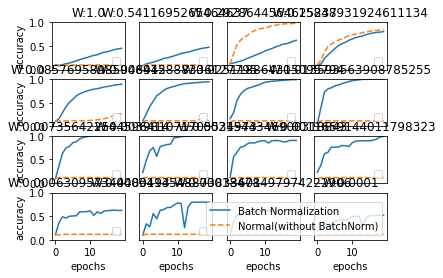

In [12]:
# mnist를 이용한 배치 정규화 계층 사용 실험
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common_multi_layer_net_extend import MultiLayerNetExtend
from common_optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)


x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

[실선이 배치 정규화를 사용한 경우, 점선이 사용하지 않은 경우: 가중치 초깃값의 표준편차는 각 그래프 위에 표기]

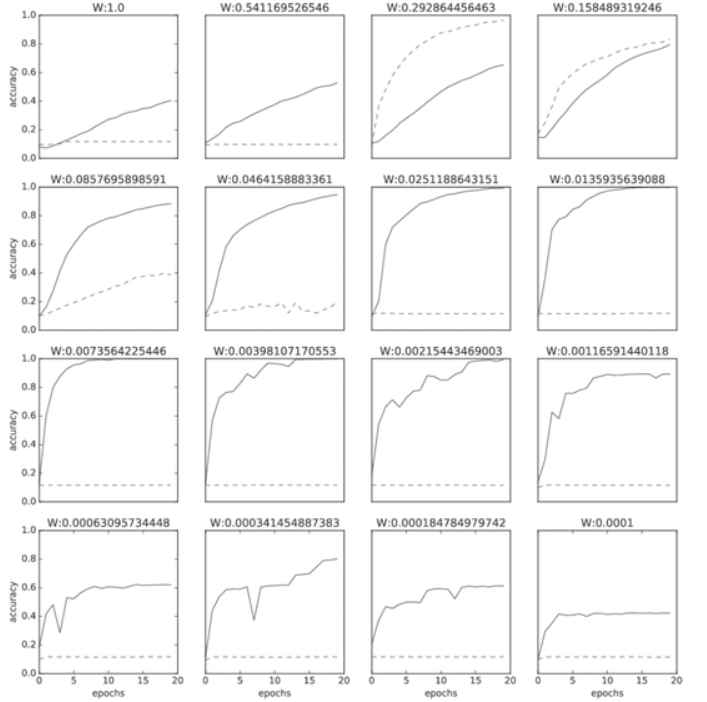

## 바른 학습을 위해
기계 학습에서는 오버피팅이 문제가 되는 일이 많음. 오버피팅이란 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응되지 못하는 상태를 말함.

<br/>
오버피팅은 주로 다음의 두 경우에 일어남.
1. 매개변수가 많고 표현력이 높은 모델
2. 훈련 데이터가 적음

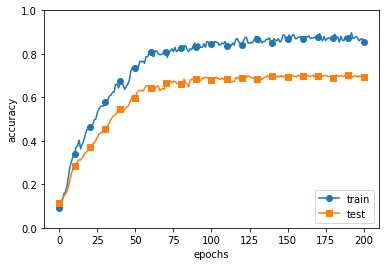

In [15]:
# 오버피팅 결과

import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common_multi_layer_net import MultiLayerNet
from common_optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]


max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr = 0.01)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grads = network.gradient(x_batch, t_batch)
  optimizer.update(network.params, grads)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    epoch_cnt += 1
    if epoch_cnt >= max_epochs:
      break

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 가중치 감소

오버피팅 억제용으로 예로부터 많이 이용해온 방법 중 가중치감소가 있음. 이는 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 패널티를 부과하여 오버피팅을 억제하는 방법임. 원래 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문

epoch 0, train_acc: 0.07666666666666666, test_acc: 0.0942
epoch 1, train_acc: 0.09333333333333334, test_acc: 0.0943
epoch 2, train_acc: 0.10333333333333333, test_acc: 0.1038
epoch 3, train_acc: 0.11, test_acc: 0.1148
epoch 4, train_acc: 0.14333333333333334, test_acc: 0.1288
epoch 5, train_acc: 0.18666666666666668, test_acc: 0.1401
epoch 6, train_acc: 0.20666666666666667, test_acc: 0.1545
epoch 7, train_acc: 0.23666666666666666, test_acc: 0.167
epoch 8, train_acc: 0.2733333333333333, test_acc: 0.1856
epoch 9, train_acc: 0.30666666666666664, test_acc: 0.2052
epoch 10, train_acc: 0.33666666666666667, test_acc: 0.2225
epoch 11, train_acc: 0.35333333333333333, test_acc: 0.2378
epoch 12, train_acc: 0.37666666666666665, test_acc: 0.2539
epoch 13, train_acc: 0.36333333333333334, test_acc: 0.2466
epoch 14, train_acc: 0.38, test_acc: 0.2625
epoch 15, train_acc: 0.42333333333333334, test_acc: 0.2803
epoch 16, train_acc: 0.45, test_acc: 0.2973
epoch 17, train_acc: 0.48, test_acc: 0.3083
epoch 18, 

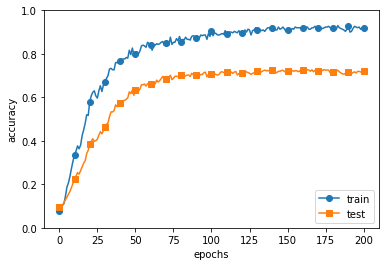

In [16]:
# λ = 0.1로 가중치 감소를 적용한 결과

import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common_multi_layer_net import MultiLayerNet
from common_optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr = 0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grads = network.gradient(x_batch, t_batch)
  optimizer.update(network.params, grads)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print(f'epoch {epoch_cnt}, train_acc: {train_acc}, test_acc: {test_acc}')

    epoch_cnt += 1
    if epoch_cnt >= max_epochs:
      break

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭아웃
- 신경망 모델이 복잡해지면 오버피팅의 억제를 드롭아웃 기법을 이용함.
- 드롭아웃은 뉴런을 임의로 삭제하면서 학습하는 방법임. 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제하고, 삭제된 뉴런은 신호를 전달하지 않게됨.
- 훈련 때는 데이터를 흘릴 때마다 삭제한 뉴런을 무작위로 선택하고, 시험 때는 모든 뉴런에 신호를 전달함. 단, 시험 때는 각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력함.

[드롭아웃의 개념: 왼쪽이 일반적인 신경망, 오른쪽이 드롭아웃을 적용한 신경망, 드롭아웃은 뉴런을 무작위로 선택해 삭제하며 신호 전달을 차단한다.]

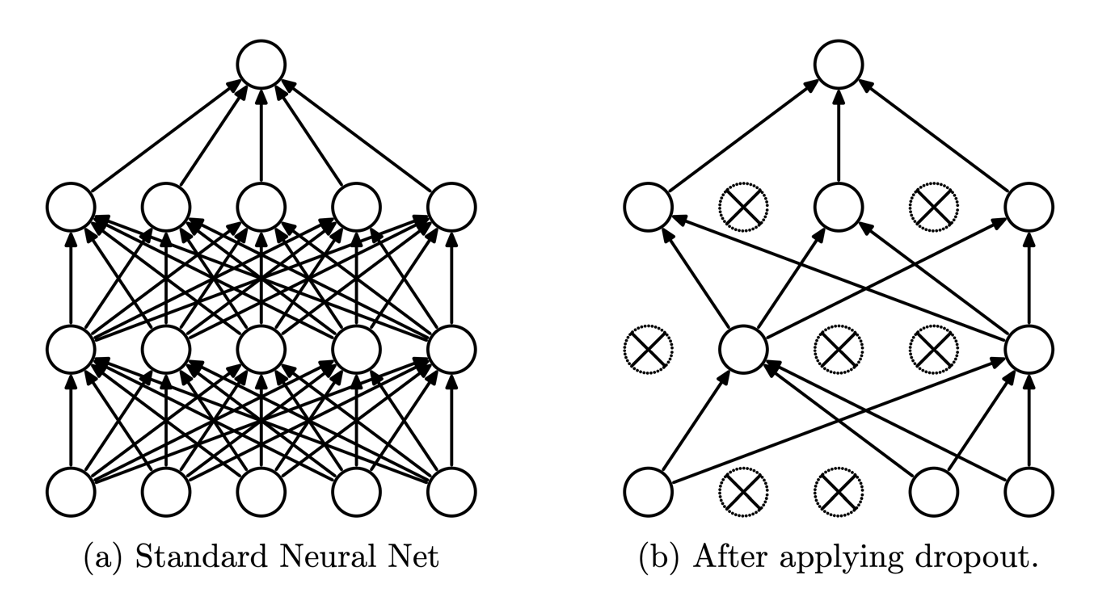

In [17]:
# 드롭아웃 구현
class Dropout:
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ration = dropout_ratio
    self.mask = None

  def forward(self, x, train_flg = True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else:
      return x * (1.0 - self.dropout_ratio)

  def backward(self, dout):
    return dout * self.mask

- 삭제할 뉴런을 False로 표시함.
- self.mask는 x와 형상이 같은 배열을 무작위로 생성하고, 그 값이 dropout_ratio보다 큰 원소만 True로 설정함.
- 역전파 때와 동작은 ReLU와 같음. 즉, 순전파 때 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과시키고, 순전파 때 통과시키지 않은 뉴런은 역전파 때도 신호를 차단함.

train loss:2.411175978668111
=== epoch:1, train acc:0.13, test acc:0.1268 ===
train loss:2.3058222834569815
train loss:2.3335717738732322
train loss:2.2689778548725634
=== epoch:2, train acc:0.14666666666666667, test acc:0.1311 ===
train loss:2.3081134499830482
train loss:2.3467375261830226
train loss:2.2652765734015143
=== epoch:3, train acc:0.15333333333333332, test acc:0.1334 ===
train loss:2.255040658675567
train loss:2.2739037216962616
train loss:2.237792201267099
=== epoch:4, train acc:0.16, test acc:0.1381 ===
train loss:2.2484290550238684
train loss:2.238703822309327
train loss:2.2545554836941553
=== epoch:5, train acc:0.19, test acc:0.1453 ===
train loss:2.2282603296084784
train loss:2.2132007111718432
train loss:2.195949565748466
=== epoch:6, train acc:0.21666666666666667, test acc:0.1584 ===
train loss:2.215752086284766
train loss:2.172423108565725
train loss:2.1473882230793935
=== epoch:7, train acc:0.21666666666666667, test acc:0.1695 ===
train loss:2.2371137607431053
trai

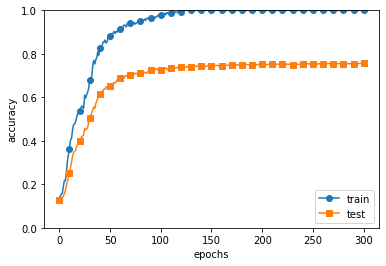

In [22]:
# 드롭아웃 적용 안할 시 오버피팅
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common_multi_layer_net_extend import MultiLayerNetExtend
from common_trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)


x_train = x_train[:300]
t_train = t_train[:300]


use_dropout = True 
dropout_ratio = 0


network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list


markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.3102865984840513
=== epoch:1, train acc:0.07666666666666666, test acc:0.0673 ===
train loss:2.2934917240236654
train loss:2.321033031719351
train loss:2.317589870431164
=== epoch:2, train acc:0.07333333333333333, test acc:0.0676 ===
train loss:2.3210561111099755
train loss:2.3180909138836343
train loss:2.3270305616721934
=== epoch:3, train acc:0.07666666666666666, test acc:0.0672 ===
train loss:2.30504488608272
train loss:2.315810682881511
train loss:2.3140416068366476
=== epoch:4, train acc:0.08666666666666667, test acc:0.0692 ===
train loss:2.3210707128729617
train loss:2.3012179783083395
train loss:2.3056460422561833
=== epoch:5, train acc:0.08666666666666667, test acc:0.0728 ===
train loss:2.3009118198972662
train loss:2.3014023742648764
train loss:2.311965751713825
=== epoch:6, train acc:0.09, test acc:0.0758 ===
train loss:2.3083548577668878
train loss:2.3112803098213215
train loss:2.2939481443478544
=== epoch:7, train acc:0.09666666666666666, test acc:0.08 ===
train

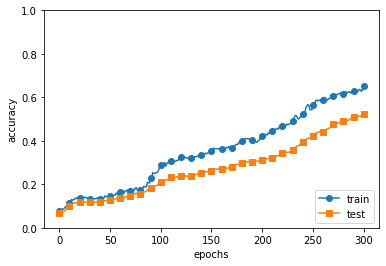

In [18]:
# 드롭아웃 적용
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common_multi_layer_net_extend import MultiLayerNetExtend
from common_trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)


x_train = x_train[:300]
t_train = t_train[:300]


use_dropout = True 
dropout_ratio = 0.2


network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list


markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 드롭아웃 적용 후 훈련데이터와 시험 데이터에 대한 정확도 차이가 줄어듦.
- 훈련 데이터에 대한 정확도가 100%에 도달하지도 않게 됨.

## 적절한 하이퍼파라미터 값 찾기


### 검증 데이터

훈련 데이터는 매개변수(가중치와 편향)의 학습에 이용하고, 검증 데이터는 하이퍼파라미터의 성능을 평가하는 데 이용함. 시험 데이터는 범용 성능을 확인하기 위해서 마지막에 (이상적으로는 한 번만) 이용함.

* 훈련 데이터: 매개변수 학습
* 검증 데이터: 하이퍼파라미터 성능 평가
* 시험 데이터: 신경망의 범용 성능 평가

In [21]:
# 검증데이터 얻는 방법: 훈련 데이터 중 20%를 검증 데이터로 분리
from mnist import load_mnist
from common_util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 하이퍼파라미터 최적화

- 하이퍼파라미터를 최적화할 때의 핵심은 하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여간다는 것
- 범위를 조금씩 줄이려면 우선 대략적인 범위를 설정하고, 그 범위에서 무작위로 하이퍼파라미터 값을 골라낸(샘플링) 후, 그 값으로 정확도를 평가함.
- 정확도를 잘 살피면서 이 작업을 여러번 반복하여 하이퍼파리미터의 '최적 값'의 범위를 좁혀가는 것임.
- 신경망의 하이퍼파라미터 최적화에서는 그리드 서치같은 규칙적인 탐색보다는 무작위로 샘플링해 탐색하는 편이 좋은 결과를 낸다고 알려져있음. 이는 최종 정확도에 미치는 영향력이 하이퍼파라미터마다 다르기 때문임.
- 하이퍼파라미터의 범위는 대략적으로 지정하는 것이 효과적임. 실제로도 0.001에서 1.000 사이와 같이 10의 거듭제곱 단위로 범위를 지정함. 이를 로그 스케일로 지정한다고 함. 

- 0단계
  - 하이퍼 파라미터 값의 범위를 설정합니다.
- 1단계
  - 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출합니다.
- 2단계
  - 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가합니다.(단, 에폭은 작게 설정합니다.)
- 3단계
  - 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힙니다.

### 하이퍼파라미터 최적화 구현하기

val acc:0.33 | lr:0.00221765965060785, weight decay:7.252182330821667e-05
val acc:0.14 | lr:3.4685581749348387e-06, weight decay:2.0385367171418344e-08
val acc:0.11 | lr:4.3628929522053284e-06, weight decay:3.975064472896639e-06
val acc:0.17 | lr:0.0002719435615957766, weight decay:3.990816415553806e-08
val acc:0.27 | lr:0.0013172839501648331, weight decay:1.021049958784458e-06
val acc:0.1 | lr:1.3702732901857212e-06, weight decay:2.0482501878343436e-08
val acc:0.09 | lr:0.0004325967650522333, weight decay:1.2328444156437564e-07
val acc:0.17 | lr:7.539045854629826e-05, weight decay:3.7475293465420094e-08
val acc:0.07 | lr:0.00021059368545700777, weight decay:1.7493780504463584e-05
val acc:0.58 | lr:0.0050379162310949495, weight decay:4.044953753167219e-08
val acc:0.09 | lr:1.528419696862619e-06, weight decay:3.988976018640171e-07
val acc:0.45 | lr:0.004589963515556543, weight decay:2.277414294632031e-05
val acc:0.11 | lr:0.0002108204230820699, weight decay:6.938341167533032e-08
val acc

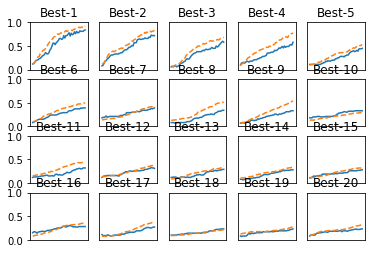

In [23]:
# mnist를 이용한 하이퍼 파라미터 최적화 구현
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common_multi_layer_net import MultiLayerNet
from common_util import shuffle_dataset
from common_trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)


x_train = x_train[:500]
t_train = t_train[:500]


validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)


    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list


print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

## 정리
- 매개변수 갱신 방법에는 확률적 경사 하강법(SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있다.
- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는데 매우 중요하다.
- 가중치의 초깃값으로는 'Xavier 초깃값'과 'He 초깃값'이 효과적이다.
- 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
- 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
- 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점타 좁히면서 하는 것이 효과적이다.